**Introduction to Artificial Neural Networks**

# Setting some frequently used lib

In [1]:

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


# Perceptrons
Perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

# Activation functions
In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. 

In [4]:
#some very basic are:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [5]:
logit(10)

0.9999546021312976

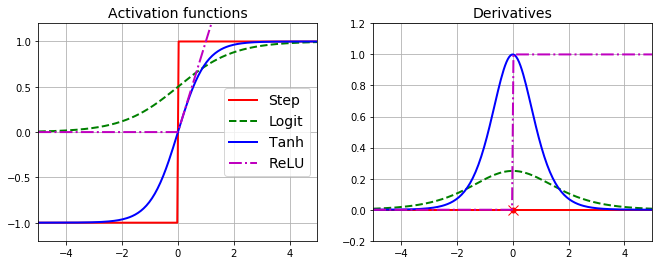

In [9]:
# Let us visualize the range of derivative of these activation funstion becuase further we will be dealing with these only.
import matplotlib.pyplot as plt
%matplotlib inline
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [10]:
# Further we have some more functions:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

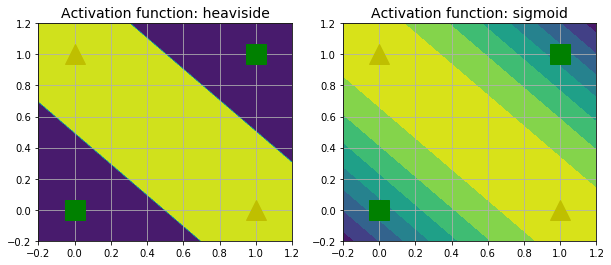

In [11]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST
Now lets get right into some basic implementation of the the Tensorflow in designing some Artificial Nueral Network.

## Using tf.learn
First simply using the Out of the box library 

In [12]:
import tensorflow as tf

In [13]:
type(tf)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

In [14]:
# Let's load the very famous dataset MNIST
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/")

W0807 03:55:19.055497 140529362130752 deprecation.py:323] From <ipython-input-14-c6c398c7639e>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0807 03:55:19.056945 140529362130752 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0807 03:55:19.058825 140529362130752 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future v

Extracting data/train-images-idx3-ubyte.gz


W0807 03:55:19.388147 140529362130752 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0807 03:55:19.450185 140529362130752 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [15]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [16]:
X_train.shape

(55000, 784)

In [17]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fcf399cbdd8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fcf399e1080>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fcf399e1128>)

In [18]:
X_test.shape

(10000, 784)

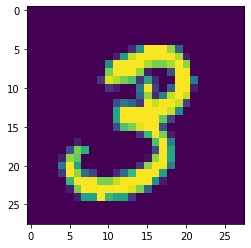

In [19]:
# Just take a look at how the data look
plt.imshow(X_train[1].reshape(28, -1))

In [20]:
y_train[1]

3

In [21]:
#Using straight of the art Tf.learn lib nothing to do much just apply the model
#Here we have used the 3 hidden layers with neurons 200,200,200 each and the no.of classes in our output layer will be 10
#We are also passing the data into the batch size of 50 and the steps=30000
config = tf.contrib.learn.RunConfig(tf_random_seed=42)

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[200, 200, 200], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=30000)

W0807 03:57:09.512893 140529362130752 deprecation.py:323] From <ipython-input-21-163c1d1d1d67>:2: RunConfig.__init__ (from tensorflow.contrib.learn.python.learn.estimators.run_config) is deprecated and will be removed in a future version.
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
W0807 03:57:09.516350 140529362130752 deprecation.py:323] From <ipython-input-21-163c1d1d1d67>:4: infer_real_valued_columns_from_input (from tensorflow.contrib.learn.python.learn.estimators.estimator) is deprecated and will be removed in a future version.
Instructions for updating:
Please specify feature columns explicitly.
W0807 03:57:09.518561 140529362130752 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py:143: setup_train_data_feeder (from tensorflow.contrib.learn.python.learn.learn_io.data_feeder) is deprecated and will be removed in a future version.
Instruc

SKCompat()

In [22]:
feature_cols

[_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]

In [23]:
# check the accuracy score
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

W0807 04:00:25.855851 140529362130752 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


0.9822

In [24]:
# check the Cross-entropy loss 
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07848147135794481

## Using plain TensorFlow
### NOW HERE COMES THE BEST PART CONTRUCTING THE NUERAL NETWORK USING THE PLAIN TENSORFLOW WHICH GIVES US MORE POWER TO OPTIMISE OUR ACCURACY SCORE

#### Construction phase

In [25]:
len(X_train[0])

784

In [26]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 150
n_hidden2 = 150
n_outputs = 10


**Defining placeholders**
A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data.

In [34]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

**Let's define a function for creating the layers of out DNN**

In [35]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

**Defining the loss function**

In [36]:
# For regression:
# with tf.name_scope("regloss"):
#     loss = tf.reduce_mean(tf.square(y-logits), name="regloss")

In [37]:
# Here softmax gives us the probability of our output to which class it belongs to
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

**Defining the gradient descent optimizer**

In [38]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

**Specifying how to evaluate the model**

In [39]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

**Initialize variables and create saver**

In [40]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

**Define the number of epochs**

In [41]:
n_epochs = 40
batch_size = 50

**Train the model**

In [42]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "model_ckps/my_model_final.ckpt")

0 Train accuracy: 0.88 Val accuracy: 0.8942
1 Train accuracy: 0.92 Val accuracy: 0.917
2 Train accuracy: 0.9 Val accuracy: 0.9288
3 Train accuracy: 0.96 Val accuracy: 0.9352
4 Train accuracy: 0.92 Val accuracy: 0.9442
5 Train accuracy: 0.92 Val accuracy: 0.9474
6 Train accuracy: 0.94 Val accuracy: 0.9516
7 Train accuracy: 0.96 Val accuracy: 0.9564
8 Train accuracy: 0.92 Val accuracy: 0.9568
9 Train accuracy: 0.94 Val accuracy: 0.9604
10 Train accuracy: 0.98 Val accuracy: 0.9626
11 Train accuracy: 0.92 Val accuracy: 0.9642
12 Train accuracy: 0.98 Val accuracy: 0.9654
13 Train accuracy: 0.94 Val accuracy: 0.9656
14 Train accuracy: 1.0 Val accuracy: 0.9656
15 Train accuracy: 0.98 Val accuracy: 0.968
16 Train accuracy: 0.98 Val accuracy: 0.9692
17 Train accuracy: 0.94 Val accuracy: 0.9702
18 Train accuracy: 0.98 Val accuracy: 0.9704
19 Train accuracy: 0.98 Val accuracy: 0.9712
20 Train accuracy: 1.0 Val accuracy: 0.9708
21 Train accuracy: 1.0 Val accuracy: 0.9722
22 Train accuracy: 1.0 Val

**Using the Neural Network**

In [43]:
# now after saving the model we can use that model by:
with tf.Session() as sess:
    saver.restore(sess, "model_ckps/my_model_final.ckpt") # use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

In [44]:
!ls -l model_ckps/

total 600
-rw-r--r-- 1 anubhav68649161 anubhav68649161     95 Aug  7 04:11 checkpoint
-rw-r--r-- 1 anubhav68649161 anubhav68649161 567640 Aug  7 04:11 my_model_final.ckpt.data-00000-of-00001
-rw-r--r-- 1 anubhav68649161 anubhav68649161    304 Aug  7 04:11 my_model_final.ckpt.index
-rw-r--r-- 1 anubhav68649161 anubhav68649161  30950 Aug  7 04:11 my_model_final.ckpt.meta
-rw-r--r-- 1 anubhav68649161 anubhav68649161     42 May 21 06:08 README.txt


In [45]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


### So this was the very basic and simple Implementation of an Artificial Nueral Network.